In [20]:
import pandas as pd
import numpy as np
import datetime
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [21]:
data = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

In [22]:
data

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [23]:
# 1. Get the numerical variables from our dataset.

In [24]:
numerical_df = data.select_dtypes(include='number')

In [25]:
numerical_df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [26]:
# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

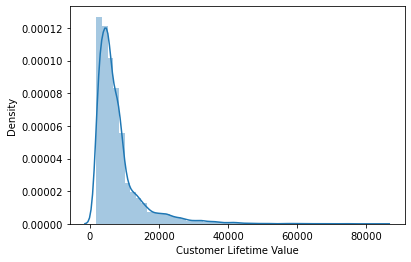

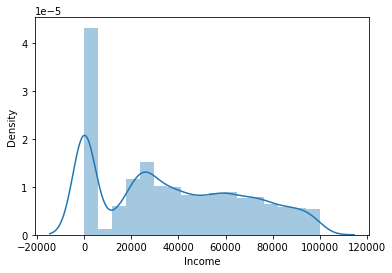

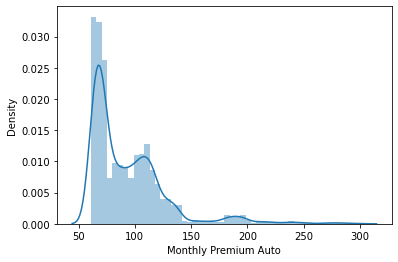

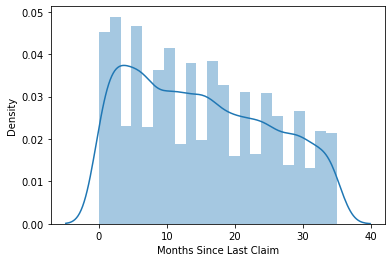

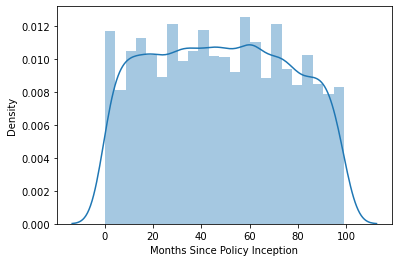

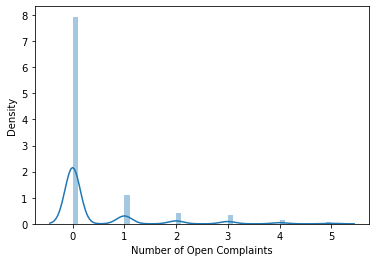

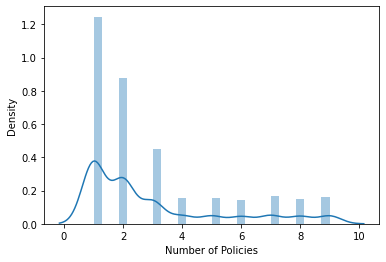

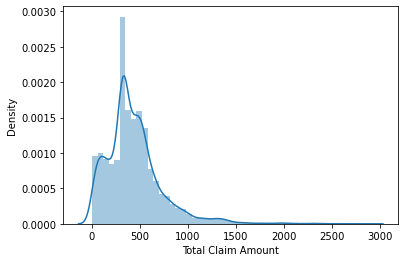

In [27]:
for column in data.select_dtypes(np.number).columns: 
    sns.distplot(data[column])
    plt.show()

Customer Lifetime Value follows an exponential distribution, also Monthly Premium Auto seems could fit into the exponential distribution. Total Claim Amount looks more like a normal distribution, and the rest doesn't fit into either. 

In [28]:
# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [48]:
numerical_df1 = numerical_df.copy()

In [49]:
scaler = StandardScaler()

scaler.fit(numerical_df1)

df_scaled = scaler.transform(numerical_df1)

print(df_scaled)

[[-0.76287773  0.61282744 -0.70392465 ... -0.42224956 -0.82264788
  -0.16963969]
 [-0.14924546 -1.23961684  0.02269103 ... -0.42224956  2.10615996
   2.400737  ]
 [ 0.71063622  0.36570978  0.42959581 ... -0.42224956 -0.40424676
   0.45573376]
 ...
 [ 0.02313483 -1.23961684 -0.23889062 ...  2.87324529 -0.40424676
   1.22793667]
 [-0.06993547 -0.51735647  0.08082028 ... -0.42224956  0.01415436
   0.88511256]
 [-0.78495478 -1.23961684 -0.47140763 ... -0.42224956 -0.82264788
  -0.22200449]]


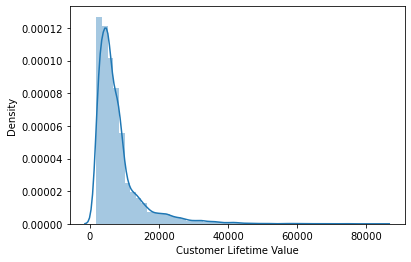

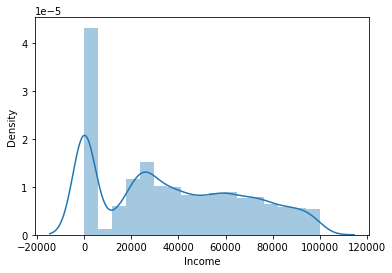

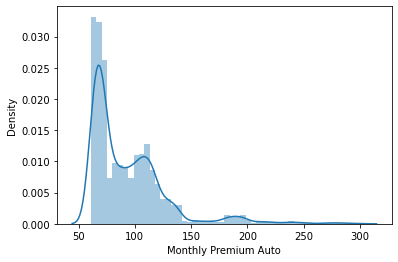

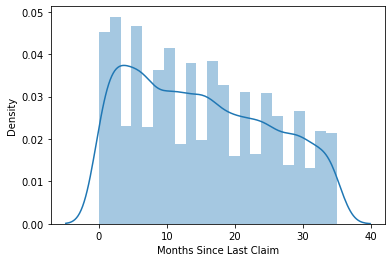

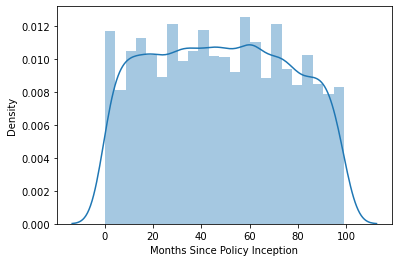

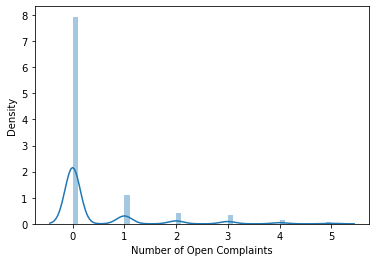

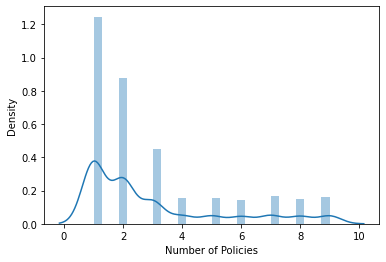

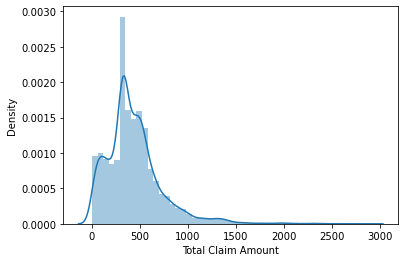

In [50]:
for column in numerical_df1.select_dtypes(np.number).columns: 
    sns.distplot(numerical_df1[column])
    plt.show()

In [51]:
numerical_df2 = numerical_df.copy()

In [54]:
df_log = numerical_df2.apply(lambda x: np.log(x))

print(df_log)

      Customer Lifetime Value     Income  Monthly Premium Auto  \
0                    7.924260  10.937988              4.234107   
1                    8.850738       -inf              4.543295   
2                    9.464008  10.794809              4.682131   
3                    8.941920       -inf              4.663439   
4                    7.942253  10.688211              4.290459   
...                       ...        ...                   ...   
9129                10.060747  11.183602              4.290459   
9130                 8.038031   9.980634              4.369448   
9131                 9.007476       -inf              4.442651   
9132                 8.925912   9.996112              4.564348   
9133                 7.867809       -inf              4.343805   

      Months Since Last Claim  Months Since Policy Inception  \
0                    3.465736                       1.609438   
1                    2.564949                       3.737670   
2              

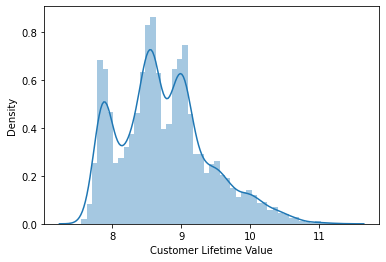

ValueError: cannot convert float NaN to integer

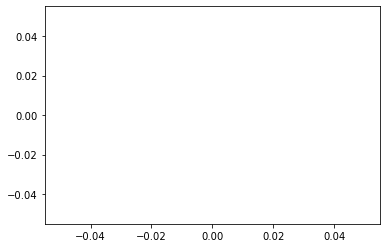

In [55]:
for column in df_log.select_dtypes(np.number).columns: 
    sns.distplot(df_log[column])
    plt.show()

In [61]:
def log_transform(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NAN

In [67]:
df_log = numerical_df2.apply(log_transform)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [68]:
# With the StandardScaler the distributions haven't changed, I tried to do a log transformation but I can't make it work.